# Python Project

Include intro:

In [240]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [241]:
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## EDA

In [242]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

### Train Dataset

In [243]:
train.shape

(891, 12)

In [244]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [246]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [247]:
train.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [248]:
train['Sex']= pd.get_dummies(train['Sex'])
train['Embarked']= pd.get_dummies(train['Embarked'])

In [249]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [250]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [251]:
train['Age'].mean()

29.69911764705882

In [252]:
train['Age'].fillna(30, inplace=True)

In [253]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Test Dataset

In [254]:
test.shape

(418, 11)

In [255]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [256]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## The model

In [257]:
features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train[features]
y = train['Survived']

In [258]:
y= y.values

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, stratify=y)

In [222]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [223]:
model = Sequential()
model.add(Dense(32, # How many neurons do you want in your first layer.
                input_shape=(8,),
                activation='relu'))
model.add(Dense(1))

In [224]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [225]:
#model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size=512)

In [227]:
#model.predict(X_test_sc)

In [226]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=512, verbose=0)

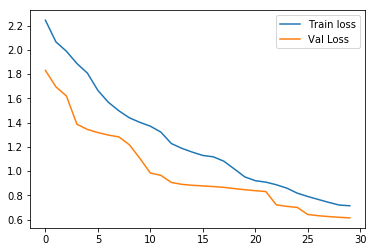

In [228]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

## Accuracy viewing

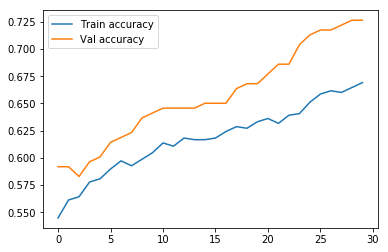

In [229]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

# Make classification

In [270]:
#X, y = make_classification(n_samples=10_000, n_features=20, random_state=42)

In [277]:
features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train[features]
y = train['Survived']
y= y.values

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [279]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [283]:
model = Sequential()
model.add(Dense(32,
                input_shape=(8,),
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [284]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [285]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=512, verbose=0)

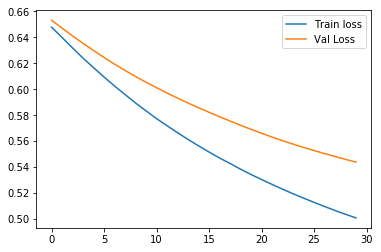

In [286]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

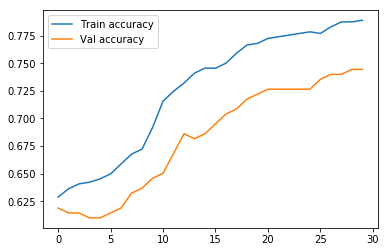

In [287]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [289]:
predictions = model.predict(X_test_sc)

In [293]:
for i in predictions:
    if i >=0.5:
        i=1
        inplace=True
    else:
        i=0
        Inplace=True

In [294]:
predictions

array([[0.18345416],
       [0.4027472 ],
       [0.42532068],
       [0.43253136],
       [0.2312232 ],
       [0.58167493],
       [0.6831291 ],
       [0.3749007 ],
       [0.31527138],
       [0.348745  ],
       [0.40192705],
       [0.71736634],
       [0.1769054 ],
       [0.22386783],
       [0.30560422],
       [0.2334666 ],
       [0.46465525],
       [0.22587821],
       [0.50389993],
       [0.19620913],
       [0.6232855 ],
       [0.6514812 ],
       [0.21852314],
       [0.4350475 ],
       [0.17709002],
       [0.1869367 ],
       [0.5236888 ],
       [0.22404987],
       [0.66813767],
       [0.47771758],
       [0.41417518],
       [0.22218272],
       [0.344857  ],
       [0.3377657 ],
       [0.43170634],
       [0.2283755 ],
       [0.2213319 ],
       [0.40709376],
       [0.40272626],
       [0.20185623],
       [0.24518722],
       [0.40469715],
       [0.78900623],
       [0.4904485 ],
       [0.62321967],
       [0.20936206],
       [0.15927577],
       [0.175